In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [15]:
# note that for Windows Python 3.8. you need to use ./ to indicate parent directory
# in some other systems it might be ../

df=pd.read_csv("./input/attacks.csv", encoding='ISO-8859-1')

In [46]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [52]:
#count how many na values there are
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [53]:
df.notna().sum()

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [56]:
# Drop rows where date and year has NaN value - these rows are useless for our analysis

df2=df.dropna(subset=['Date', 'Year'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6299 non-null   object 
 1   Date                    6300 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6296 non-null   object 
 4   Country                 6250 non-null   object 
 5   Area                    5845 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5756 non-null   object 
 8   Name                    6090 non-null   object 
 9   Sex                     5735 non-null   object 
 10  Age                     3470 non-null   object 
 11  Injury                  6272 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3463 non-null   

In [42]:
pattern_date="\d{2}\-\w{3}\-\d{4}"
reg_date=re.compile(pattern_date)

In [89]:
df2["Date_clean"]=df2.apply(lambda row: str(re.findall(pattern_date,row["Date"]))[2:-2] if reg_date.search(str(row["Date"])) else row["Year"], axis=1)
df2.head()

C:\Users\vikto\AppData\Local\Temp\ipykernel_38492\1132734240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date_clean"]=df2.apply(lambda row: str(re.findall(pattern_date,row["Date"]))[2:-2] if reg_date.search(str(row["Date"])) else row["Year"], axis=1)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Date_clean
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6301
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6299 non-null   object 
 1   Date                    6300 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6296 non-null   object 
 4   Country                 6250 non-null   object 
 5   Area                    5845 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5756 non-null   object 
 8   Name                    6090 non-null   object 
 9   Sex                     5735 non-null   object 
 10  Age                     3470 non-null   object 
 11  Injury                  6272 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3463 non-null   

In [113]:
# remove the unnecessary columns: Case Number, pdf, href formula, href, Case Number.1, Case Number.2, original order, 22 and 23
df3=df2.drop(['Case Number','pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2','original order','Unnamed: 22','Unnamed: 23'],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6300 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6296 non-null   object 
 3   Country                 6250 non-null   object 
 4   Area                    5845 non-null   object 
 5   Location                5761 non-null   object 
 6   Activity                5756 non-null   object 
 7   Name                    6090 non-null   object 
 8   Sex                     5735 non-null   object 
 9   Age                     3470 non-null   object 
 10  Injury                  6272 non-null   object 
 11  Fatal (Y/N)             5762 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3463 non-null   object 
 14  Investigator or Source  6283 non-null   

In [114]:
# remove values where Year and Date_clean are 0

df4=df3[(df3['Year']!=0)&(df3['Date_clean']!=0)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6175 entries, 0 to 6176
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6175 non-null   object 
 1   Year                    6175 non-null   float64
 2   Type                    6171 non-null   object 
 3   Country                 6129 non-null   object 
 4   Area                    5746 non-null   object 
 5   Location                5670 non-null   object 
 6   Activity                5649 non-null   object 
 7   Name                    5970 non-null   object 
 8   Sex                     5618 non-null   object 
 9   Age                     3457 non-null   object 
 10  Injury                  6148 non-null   object 
 11  Fatal (Y/N)             5638 non-null   object 
 12  Time                    2941 non-null   object 
 13  Species                 3428 non-null   object 
 14  Investigator or Source  6158 non-null   

In [115]:
# replace 0 years with years from the date

df4['Year']=df4.apply(lambda row: str(row['Date_clean'])[-4:] if row['Year']==0 else row['Year'], axis=1)
df4.tail()

C:\Users\vikto\AppData\Local\Temp\ipykernel_38492\3341651514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year']=df4.apply(lambda row: str(row['Date_clean'])[-4:] if row['Year']==0 else row['Year'], axis=1)


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Date_clean
6172,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,NaN,UNKNOWN,NaN,Possibly white sharks,G. Rondelet,1554.0
6173,Ca. 1543,1543.0,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,FATAL,Y,NaN,NaN,J. Castro,1543.0
6174,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro,500.0
6175,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77.0
6176,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,5.0


<AxesSubplot:xlabel='Year', ylabel='Count'>

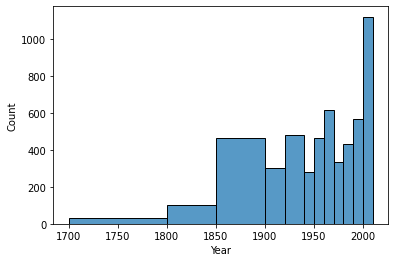

In [122]:
sns.histplot(x=df4.Year, bins=[1700,1800,1850,1900,1920,1940,1950,1960,1970,1980,1990,2000,2010])

In [128]:
#Strip the column names of spaces

df4=df4.rename(columns=lambda x: x.strip())

In [130]:
df4.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source', 'Date_clean'],
      dtype='object')

In [132]:
# replace Date with Date_clean
df4['Date']=df4['Date_clean']

In [136]:
# Drop Date_clean
df4=df4.drop(['Date_clean'],axis=1)

In [138]:
# Change column names - make them shorter

df4=df4.rename(columns={'Fatal (Y/N)':'Fatal','Investigator or Source':'Source'})

In [145]:
# Clean the values from Fatal and Sex

df4['Fatal']=df4['Fatal'].str.strip().str.upper()
df4['Sex']=df4['Sex'].str.strip().str.upper()

In [152]:
# Put all the country names in lower letters and capitalize
# Replace Usa with USA

df4['Country']=df4['Country'].str.lower().str.capitalize()
df4['Country'].replace(to_replace='Usa', value='USA', inplace=True)

In [162]:
# Filter out the values where Fatal or Sex is not clear

df5=df4[((df4['Fatal']=='N') | (df4['Fatal']=='Y')) & ((df4['Sex']=='M') | (df4['Sex']=='F'))]

In [164]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 6176
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5114 non-null   object 
 1   Year      5114 non-null   float64
 2   Type      5111 non-null   object 
 3   Country   5078 non-null   object 
 4   Area      4792 non-null   object 
 5   Location  4725 non-null   object 
 6   Activity  4841 non-null   object 
 7   Name      5063 non-null   object 
 8   Sex       5114 non-null   object 
 9   Age       3185 non-null   object 
 10  Injury    5113 non-null   object 
 11  Fatal     5114 non-null   object 
 12  Time      2695 non-null   object 
 13  Species   2655 non-null   object 
 14  Source    5104 non-null   object 
dtypes: float64(1), object(14)
memory usage: 639.2+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

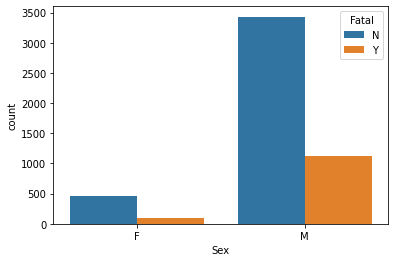

In [166]:
sns.countplot(data=df5, x="Sex", hue="Fatal")

<AxesSubplot:xlabel='Year', ylabel='Count'>

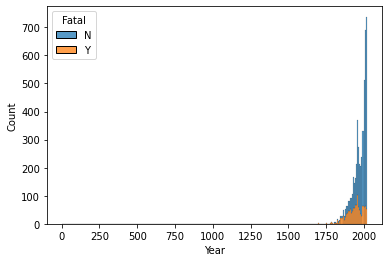

In [167]:
sns.histplot(data=df5, x='Year', hue='Fatal', multiple='stack')

In [186]:
# cut the data to display only the recent cases

df_recent=df5[(df5['Year']>=1800)]

In [169]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 6151
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5099 non-null   object 
 1   Year      5099 non-null   float64
 2   Type      5096 non-null   object 
 3   Country   5065 non-null   object 
 4   Area      4782 non-null   object 
 5   Location  4715 non-null   object 
 6   Activity  4829 non-null   object 
 7   Name      5048 non-null   object 
 8   Sex       5099 non-null   object 
 9   Age       3183 non-null   object 
 10  Injury    5098 non-null   object 
 11  Fatal     5099 non-null   object 
 12  Time      2694 non-null   object 
 13  Species   2653 non-null   object 
 14  Source    5089 non-null   object 
dtypes: float64(1), object(14)
memory usage: 637.4+ KB


<AxesSubplot:xlabel='Year', ylabel='Count'>

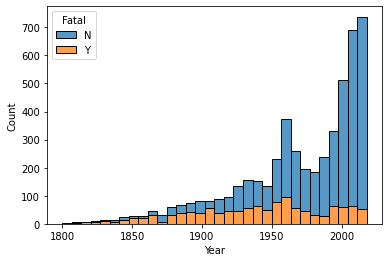

In [193]:
sns.histplot(data=df_recent, x='Year', hue='Fatal', multiple='stack')

In [188]:
df_recent['Country'].value_counts()

USA                     1923
Australia               1069
South africa             450
Papua new guinea         109
New zealand              102
                        ... 
Netherlands antilles       1
Egypt / israel             1
Argentina                  1
Sudan?                     1
Ghana                      1
Name: Country, Length: 184, dtype: int64

In [177]:
cntr='Egypt / israel'

In [178]:
cntr.split('/')[0].strip()

'Egypt'

In [189]:
# Clean up the country list

df_recent['Country']=df_recent['Country'].str.split('/').str[0].str.strip()

C:\Users\vikto\AppData\Local\Temp\ipykernel_38492\289881136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Country']=df_recent['Country'].str.split('/').str[0].str.strip()


In [194]:
countries=df_recent['Country'].value_counts()

<AxesSubplot:xlabel='Year', ylabel='count'>

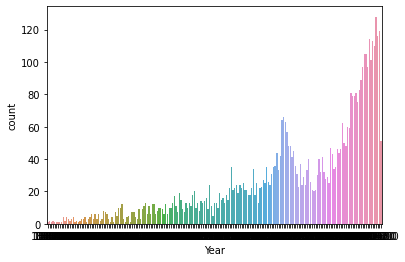

In [191]:
sns.countplot(data=df_recent, x='Year')

In [199]:
top_50_countries=countries[:50]

In [200]:
top_50_countries

USA                     1923
Australia               1069
South africa             450
Papua new guinea         109
New zealand              102
Bahamas                   99
Brazil                    89
Mexico                    71
Fiji                      55
Reunion                   52
Italy                     44
Philippines               43
Cuba                      37
New caledonia             36
Egypt                     35
Mozambique                34
Spain                     29
Panama                    28
India                     27
Solomon islands           27
Iran                      26
Japan                     24
Hong kong                 23
French polynesia          22
Croatia                   22
Jamaica                   21
Indonesia                 18
England                   18
Costa rica                15
Pacific ocean             14
Vietnam                   13
Tonga                     13
Greece                    11
Vanuatu                   11
Atlantic ocean

In [201]:
sum(top_50_countries)

4754